In [13]:
import numpy as np
import random 
import copy
from utils_hand import *
import matplotlib.pyplot as plt

In [2]:
data = open('dinos.txt','r').read() 
data = data.lower() 
chars = list(set(data)) 
data_size, vocab_size = len(data) , len(chars) 
print(data_size) 
print(type(data))
print(vocab_size) 
print(chars)

19909
<class 'str'>
27
['y', 't', 'g', 'm', 'w', 'q', 'i', 'l', 'p', 'u', 'b', 'f', '\n', 'x', 'a', 's', 'z', 'o', 'j', 'e', 'k', 'd', 'c', 'n', 'r', 'v', 'h']


In [3]:
chars = sorted(chars) 
print(chars)

['\n', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [4]:
char_to_ix = {ch:ix for ix,ch in enumerate(chars)}
ix_to_char = {ix:ch for ix,ch in enumerate(chars)} 
print(char_to_ix)

{'\n': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [5]:
def clip(gradient,maxVa) : 
    gradients = copy.deepcopy(gradient) 
    dWaa, dWax, dWya, db, dby = gradients['dWaa'], gradients['dWax'], gradients['dWya'], gradients['db'], gradients['dby']
    for gradient in [dWaa, dWax, dWya, db, dby] : 
        np.clip(gradient,-maxVa,maxVa,out=gradient) 
    gradients = {"dWaa": dWaa, "dWax": dWax, "dWya": dWya, "db": db, "dby": dby}
    return gradients 
    

In [6]:
def optimize(X,Y,a_prev,parameters,lr) : 
    value_clip = 5
    loss,cache = rnn_forward(X,Y,a_prev,parameters) 
    gradients,a = rnn_backward(X,Y,parameters,cache) 
    gradients = clip(gradients,value_clip) 
    parameters = update_parameters(parameters,gradients,lr) 
    return loss,gradients,a[len(X)-1]


In [7]:
def model(data_x,ix_to_char,char_to_ix,num_iterations = 35000, n_a = 50,dino_names = 7, vocab_size=27, verbose = False) : 
    n_x, n_y = vocab_size, vocab_size 
    parameters = initialize_parameters(n_a,n_x,n_y)
    losses = []
    #loss = initialize_loss(vocab_size,dino_names) 
    examples = [x.strip() for x in data_x] 
    np.random.seed(0) 
    np.random.shuffle(examples) 
    loss = 0 
    a_prev = np.zeros((n_a,1)) 
    
    for j in range(num_iterations) : 
        # each iteration, train with only a example 
        idx = j % len(examples) 
        single_example = examples[idx] 
        single_example_char = [c for c in single_example] 
        single_example_ix = [char_to_ix[c] for c in single_example_char] 
        # Add none to it learn probability for first char. 
        X = [None] + single_example_ix 
        # Create Y 
        ix_newline = char_to_ix['\n'] 
        Y = single_example_ix + [ix_newline]
        curr_loss, gradients, a_prev = optimize(X,Y,a_prev,parameters,lr = 0.001) 
        loss += curr_loss 
        if j % 200 == 0 and j != 0  : 
            losses.append(loss/200) 
            loss = 0 
    return parameters,losses
        

In [8]:
parameters,losses = model(data.split("\n"),ix_to_char,char_to_ix)

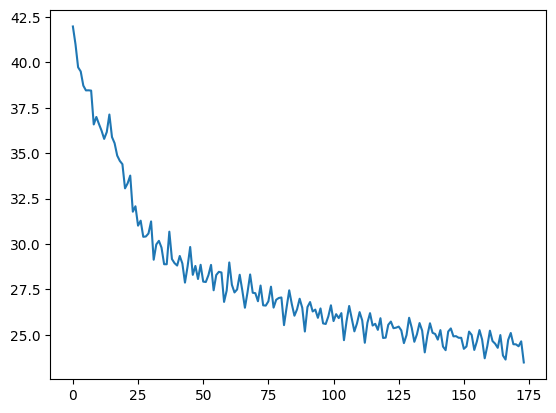

In [9]:
index = np.arange(0,len(losses),1) 
plt.plot(index,losses)

In [10]:

def sample(parameters, char_to_ix, seed):

    
    # Retrieve parameters and relevant shapes from "parameters" dictionary
    Waa, Wax, Wya, by, b = parameters['Waa'], parameters['Wax'], parameters['Wya'], parameters['by'], parameters['b']
    vocab_size = by.shape[0]
    n_a = Waa.shape[1]

    x = np.zeros((1,vocab_size))
    # Step 1': Initialize a_prev as zeros (≈1 line)
    a_prev = np.zeros((1,n_a))
    
    indices = []
    
    idx = -1 
 
    counter = 0
    newline_character = char_to_ix['\n']
    
    while (idx != newline_character and counter != 50):
        
        a = np.tanh(np.dot(Wax,x.T) + np.dot(Waa,a_prev.T) + b)
        z = np.dot(Wya,a) + by 
        y = softmax(z)
        
        np.random.seed(counter + seed) 
        idx = np.random.choice(range(len(y)),p=y.ravel())
        indices.append(idx)
        
        x = np.zeros((1,vocab_size))
        x[0,idx] = 1
        
        a_prev = a.T
        
        seed += 1
        counter +=1

    if (counter == 50):
        indices.append(char_to_ix['\n'])
    
    return indices

In [11]:
indices = sample(parameters,char_to_ix,1)

In [12]:
chars = [ix_to_char[i] for i in indices[:-1]]
"".join(chars)

'inecakosaurus'